In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv
/kaggle/input/universal-sentence-encoder/tensorflow2/cmlm-en-base/1/saved_model.pb
/kaggle/input/universal-sentence-encoder/tensorflow2/cmlm-en-base/1/assets/vocab.txt
/kaggle/input/universal-sentence-encoder/tensorflow2/cmlm-en-base/1/variables/variables.index
/kaggle/input/universal-sentence-encoder/tensorflow2/cmlm-en-base/1/variables/variables.data-00000-of-00001
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/saved_model.pb
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/keras_metadata.pb
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/assets/vocab.txt
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/variables/variables.index
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/variables/variables.data-00000-of-00001


# Data processing

In [2]:
df = pd.read_csv("/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv", encoding='ISO-8859-1')
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


In [3]:
df.rating = df.rating.str.replace(" star.*", "").astype(int)
df.rating

/tmp/ipykernel_20/2215785309.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.rating = df.rating.str.replace(" star.*", "").astype(int)


0        1
1        4
2        1
3        5
4        1
        ..
33391    1
33392    5
33393    4
33394    5
33395    5
Name: rating, Length: 33396, dtype: int64

In [4]:
df = df.drop(["reviewer_id", "store_name", "category", "store_address", "longitude", "review_time"], axis=1)
df

,latitude,rating_count,review,rating
0,30.460718,"1,240",Why does it look like someone spit on my food?...,1
1,30.460718,"1,240",It'd McDonalds. It is what it is as far as the...,4
2,30.460718,"1,240",Made a mobile order got to the speaker and che...,1
3,30.460718,"1,240",My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,30.460718,"1,240","I repeat my order 3 times in the drive thru, a...",1
...,...,...,...,...
33391,25.810000,"2,810",They treated me very badly.,1
33392,25.810000,"2,810",The service is very good,5
33393,25.810000,"2,810",To remove hunger is enough,4
33394,25.810000,"2,810","It's good, but lately it has become very expen...",5


In [5]:
df = df.iloc[:,1:]
df

,rating_count,review,rating
0,"1,240",Why does it look like someone spit on my food?...,1
1,"1,240",It'd McDonalds. It is what it is as far as the...,4
2,"1,240",Made a mobile order got to the speaker and che...,1
3,"1,240",My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"1,240","I repeat my order 3 times in the drive thru, a...",1
...,...,...,...
33391,"2,810",They treated me very badly.,1
33392,"2,810",The service is very good,5
33393,"2,810",To remove hunger is enough,4
33394,"2,810","It's good, but lately it has become very expen...",5


In [6]:
mask = df['review'].str.contains(r'^[a-zA-Z0-9\s.,!?]*$', na=False, regex=True)
df_clean_review = df[mask].copy()

In [7]:
df_clean_review

,rating_count,review,rating
4,"1,240","I repeat my order 3 times in the drive thru, a...",1
8,"1,240",Went thru drive thru. Ordered. Getting home no...,1
11,"1,240",We stopped by for a quick breakfast. It was n...,2
14,"1,240",Ordered food burger wrong and left out part of...,1
17,"1,240",The boy who attended me made me wait and when ...,1
...,...,...,...
33390,"2,810",Very. Well,5
33391,"2,810",They treated me very badly.,1
33392,"2,810",The service is very good,5
33393,"2,810",To remove hunger is enough,4


In [8]:
df_clean_review.rating_count = df_clean_review.rating_count.str.replace(",", "").astype(int)
df_clean_review

,rating_count,review,rating
4,1240,"I repeat my order 3 times in the drive thru, a...",1
8,1240,Went thru drive thru. Ordered. Getting home no...,1
11,1240,We stopped by for a quick breakfast. It was n...,2
14,1240,Ordered food burger wrong and left out part of...,1
17,1240,The boy who attended me made me wait and when ...,1
...,...,...,...
33390,2810,Very. Well,5
33391,2810,They treated me very badly.,1
33392,2810,The service is very good,5
33393,2810,To remove hunger is enough,4


In [9]:
df_clean_review.describe()

,rating_count,rating
count,20557.000000,20557.000000
mean,2151.169285,3.434694
std,1663.993848,1.540742
min,263.000000,1.000000
25%,1269.000000,2.000000
50%,1670.000000,4.000000
75%,2657.000000,5.000000
max,19682.000000,5.000000


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


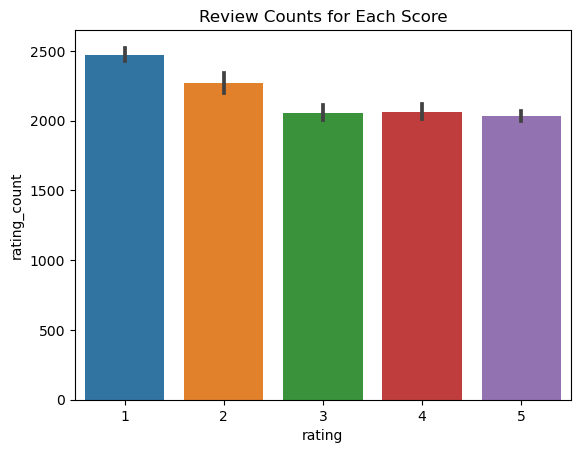

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用條形圖顯示每個評分的評論數量
sns.barplot(x='rating', y='rating_count', data=df_clean_review)
plt.title('Review Counts for Each Score')
plt.show()


In [11]:
correlation = df_clean_review['rating_count'].corr(df_clean_review['rating'])
print(f"The correlation between review counts and review score is: {correlation:.2f}")

The correlation between review counts and review score is: -0.10


In [12]:
df_clean_review = df_clean_review.iloc[:, 1:]
df_clean_review

,review,rating
4,"I repeat my order 3 times in the drive thru, a...",1
8,Went thru drive thru. Ordered. Getting home no...,1
11,We stopped by for a quick breakfast. It was n...,2
14,Ordered food burger wrong and left out part of...,1
17,The boy who attended me made me wait and when ...,1
...,...,...
33390,Very. Well,5
33391,They treated me very badly.,1
33392,The service is very good,5
33393,To remove hunger is enough,4


In [13]:
df_clean_review['review'].str.len().max()

1521

In [14]:
df_clean_review['review'].str.len().min()

1

In [15]:
import os
os.environ["TRANSFORMERS_OFFLINE"] = "1"

In [16]:
from transformers import AutoTokenizer, DistilBertModel
import torch

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/conda/lib/python3.10/site-packages/transformers/utils/hub.py:417 in cached_file             │
│                                                                                                  │
│    414 │   user_agent = http_user_agent(user_agent)                                              │
│    415 │   try:                                                                                  │
│    416 │   │   # Load from URL or cache if already cached                                        │
│ ❱  417 │   │   resolved_file = hf_hub_download(                                                  │
│    418 │   │   │   path_or_repo_id,                                                              │
│    419 │   │   │   filename,                                                                     │
│    420 │   │   │   subfolder=None if len(subfolder) == 0 else subfolder,                         │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/huggingface_hub/utils/_validators.py:118 in _inner_fn    │
│                                                                                                  │
│   115 │   │   if check_use_auth_token:                                                           │
│   116 │   │   │   kwargs = smoothly_deprecate_use_auth_token(fn_name=fn.__name__, has_token=ha   │
│   117 │   │                                                                                      │
│ ❱ 118 │   │   return fn(*args, **kwargs)                                                         │
│   119 │                                                                                          │
│   120 │   return _inner_fn  # type: ignore                                                       │
│   121                                                                                            │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1285 in hf_hub_download │
│                                                                                                  │
│   1282 │   │   # the models might've been found if local_files_only=False                        │
│   1283 │   │   # Notify the user about that                                                      │
│   1284 │   │   if local_files_only:                                                              │
│ ❱ 1285 │   │   │   raise LocalEntryNotFoundError(                                                │
│   1286 │   │   │   │   "Cannot find the requested files in the disk cache and"                   │
│   1287 │   │   │   │   " outgoing traffic has been disabled. To enable hf.co look-ups"           │
│   1288 │   │   │   │   " and downloads online, set 'local_files_only' to False."                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
LocalEntryNotFoundError: Cannot find the requested files in the disk cache and outgoing traffic has been disabled. 
To enable hf.co look-ups and downloads online, set 'local_files_only' to False.

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│    1 from transformers import AutoTokenizer, DistilBertModel                                     │
│    2 import torch                                                                                │
│    3                                                                                            

# Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_clean_review.iloc[:, 0], df_clean_review.iloc[:, 1], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape